In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import random

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.
%matplotlib inline

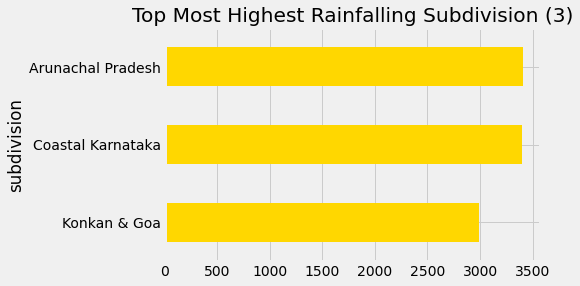

In [14]:
data = pd.read_csv('/content/rainfall_India_2017.csv').rename(columns=str.lower)
data.groupby('subdivision')[['annual']].mean().sort_values('annual').tail(3).plot.barh(title='Top Most Highest Rainfalling Subdivision (3)',color='gold',legend=False);



In [18]:
li = ['jan', 'feb', 'mar', 'apr', 'may', 'jun', 'jul',
       'aug', 'sep', 'oct', 'nov', 'dec']
h = data.drop(li,axis=1).dropna().sort_values('annual').head(1).values.tolist()
l = data.drop(li,axis=1).dropna().sort_values('annual').tail(1).values.tolist()
print('\nThe highest {} millimeter rainfall happens in {} & the year of {}. '.format(l[0][2],l[0][0],l[0][1]))
print('\nThe lowest {} millimeter rainfall happens in {} & the year of {}. '.format(h[0][2],h[0][0],h[0][1]))


 


The highest 6331.1 millimeter rainfall happens in Arunachal Pradesh & the year of 1948. 

The lowest 62.3 millimeter rainfall happens in West Rajasthan & the year of 1918. 


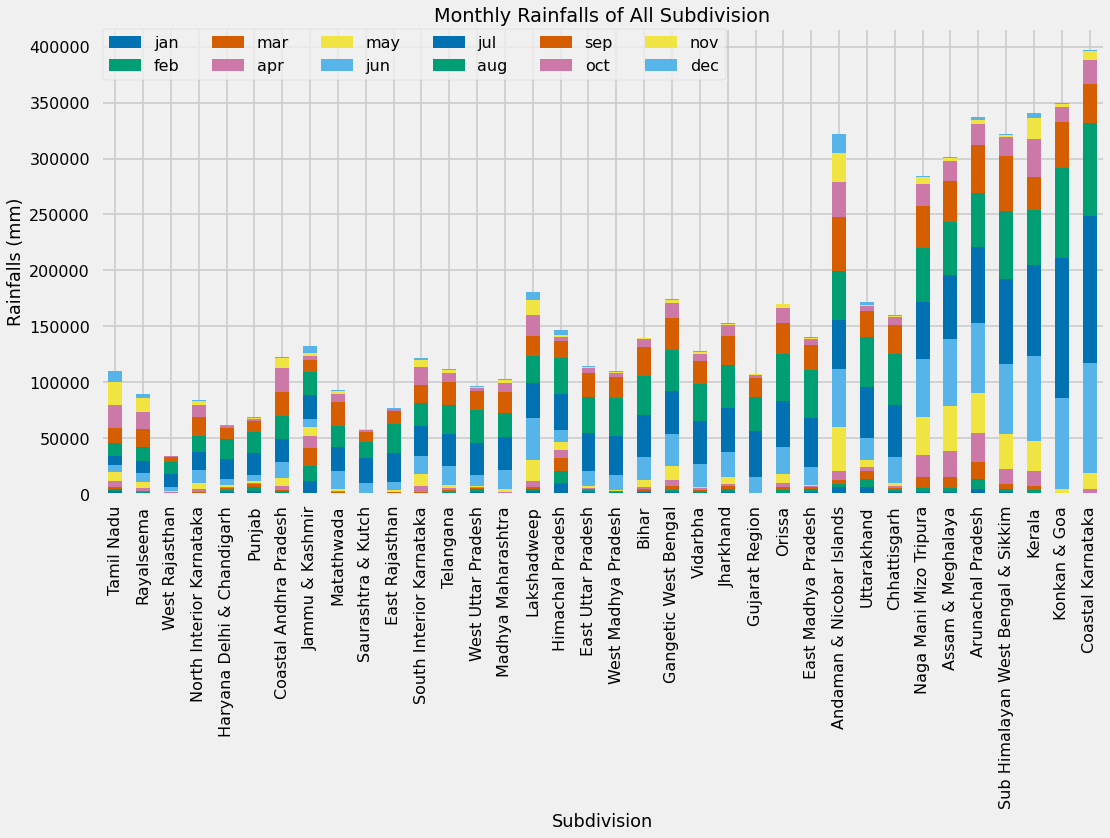

In [19]:
plt.style.use('seaborn-poster')
ax = data.drop(['annual','year'],axis=1).groupby('subdivision').sum().sort_values('jul').plot.bar(stacked=True,figsize=(16, 8),
                                                                               title='Monthly Rainfalls of All Subdivision')
ax.set_xlabel('Subdivision')
ax.set_ylabel('Rainfalls (mm)')
patches, labels = ax.get_legend_handles_labels()    
ax.legend(patches, labels, loc='upper left',ncol=6,borderaxespad=.1)
plt.show()

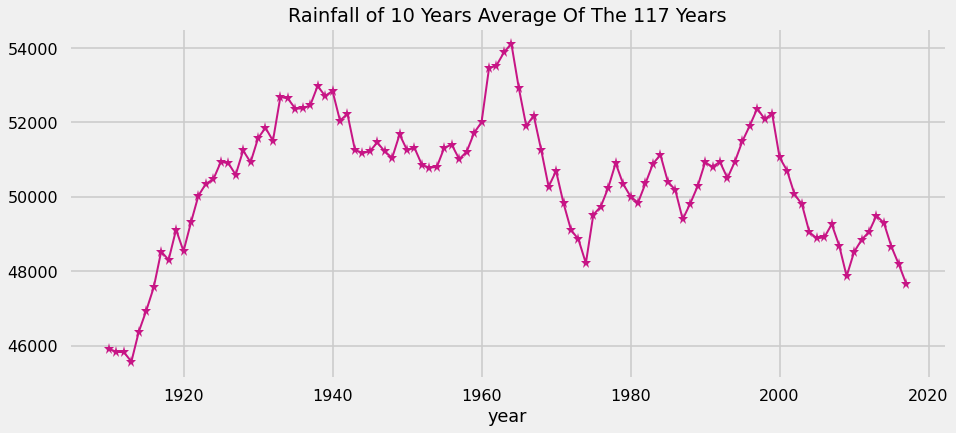

In [20]:
data.groupby('year')['annual'].sum().rolling(10).mean().plot(title='Rainfall of 10 Years Average Of The 117 Years',figsize=(14,6),linewidth=2,c='mediumvioletred',marker='*');